# Exploratory Data Analysis(EDA) of Financial  Data 

In [1]:
import numpy as np
import matplotlib .pyplot as plt
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")

In [3]:
Default = pd.read_csv('../input/financial-dataset/Default.csv')
Default.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [4]:
Default.shape

(10000, 5)

In [5]:
Default.describe()

,Unnamed: 0,balance,income
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,835.374886,33516.981876
std,2886.89568,483.714985,13336.639563
min,1.00000,0.000000,771.967729
25%,2500.75000,481.731105,21340.462903
50%,5000.50000,823.636973,34552.644802
75%,7500.25000,1166.308386,43807.729272
max,10000.00000,2654.322576,73554.233495


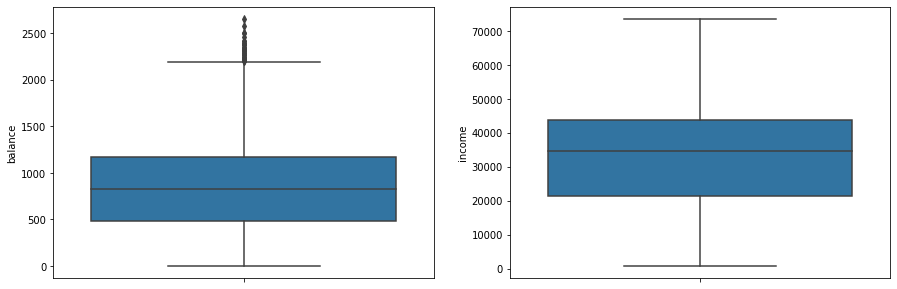

In [6]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(y=Default['balance'])

plt.subplot(1,2,2)
sns.boxplot(y=Default['income'])
plt.show()

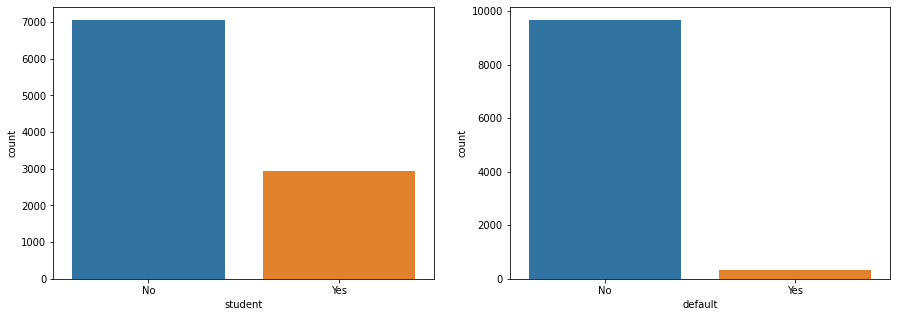

In [8]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot(Default['student'])

plt.subplot(1,2,2)
sns.countplot(Default['default'])
plt.show()

Default['student'].value_counts()

In [10]:
Default['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [11]:
Default['student'].value_counts(normalize=True)

No     0.7056
Yes    0.2944
Name: student, dtype: float64

In [12]:
Default['default'].value_counts(normalize=True)

No     0.9667
Yes    0.0333
Name: default, dtype: float64

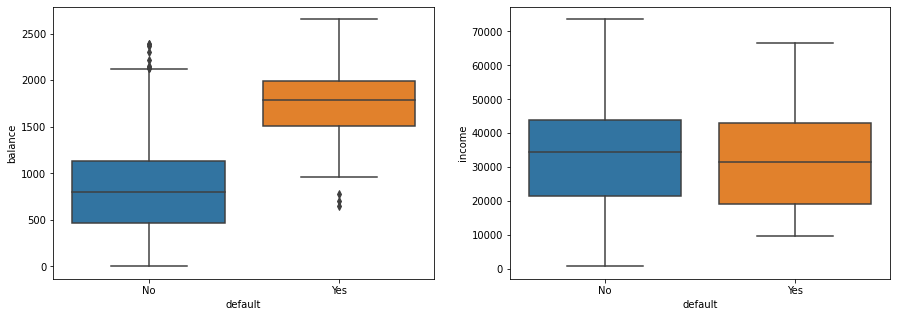

In [13]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(Default['default'],Default['balance'])

plt.subplot(1,2,2)
sns.boxplot(Default['default'],Default['income'])
plt.show()

In [14]:
pd.crosstab(Default['student'],Default['default'],normalize = 'index').round(2)

default,No,Yes
student,,
No,0.97,0.03
Yes,0.96,0.04


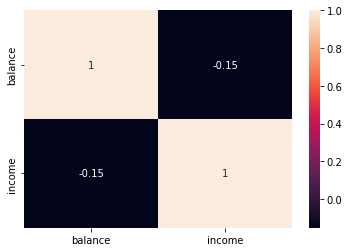

In [15]:
sns.heatmap(Default[['balance','income']].corr(),annot = True)
plt.show()

In [16]:
Default.isnull().sum()

Unnamed: 0    0
default       0
student       0
balance       0
income        0
dtype: int64

In [23]:
Q1, Q3 = Default['balance'].quantile([.25,.75])
IQR = Q3-Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

In [24]:
UL

2193.174308607817

In [25]:
df = Default[Default['balance'] > UL]
df

,Unnamed: 0,default,student,balance,income
173,174,Yes,Yes,2205.799521,14271.492253
1136,1137,Yes,No,2499.016750,51504.293960
1160,1161,Yes,Yes,2502.684931,14947.519752
1359,1360,Yes,No,2220.966201,40725.096207
1502,1503,Yes,Yes,2332.878254,11770.234124
1609,1610,Yes,Yes,2269.946966,18021.105948
2096,2097,Yes,Yes,2261.848162,20030.165119
2140,2141,No,Yes,2308.893236,19110.266412
2929,2930,Yes,Yes,2387.314867,28296.914718
3162,3163,Yes,Yes,2415.316994,17429.503375


In [26]:
df['default'].count()

31

In [27]:
df['default'].value_counts(normalize=True)

Yes    0.83871
No     0.16129
Name: default, dtype: float64

In [28]:
df['default'].value_counts()

Yes    26
No      5
Name: default, dtype: int64

In [32]:
Default['balance'] = np.where(Default['balance'] > UL, UL, Default['balance'])

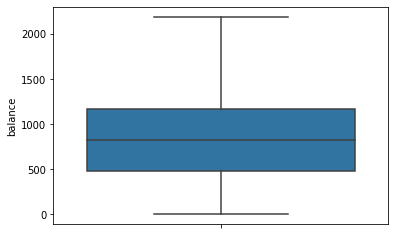

In [33]:
sns.boxplot(y=Default['balance'])
plt.show()

In [36]:
Default = pd.get_dummies(Default,drop_first = True)

In [37]:
Default.head()

,Unnamed: 0,balance,income,default_Yes,student_Yes
0,1,729.526495,44361.625074,0,0
1,2,817.180407,12106.134700,0,1
2,3,1073.549164,31767.138947,0,0
3,4,529.250605,35704.493935,0,0
4,5,785.655883,38463.495879,0,0


In [38]:
Default.columns = ['Unnamed','balance','income','default','student']

In [39]:
Default.head()

,Unnamed,balance,income,default,student
0,1,729.526495,44361.625074,0,0
1,2,817.180407,12106.134700,0,1
2,3,1073.549164,31767.138947,0,0
3,4,529.250605,35704.493935,0,0
4,5,785.655883,38463.495879,0,0


In [41]:
from sklearn.model_selection import train_test_split

In [45]:
x = Default.drop('default',axis=1)
y = Default['default']

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 21,stratify = y)

In [48]:
print(x_train.shape)
print(x_test.shape)

(7000, 4)
(3000, 4)


In [50]:
print(y_train.value_counts(normalize = True).round(2))
print(' ')
print(y_test.value_counts(normalize = True).round(2))

0    0.97
1    0.03
Name: default, dtype: float64
 
0    0.97
1    0.03
Name: default, dtype: float64


In [52]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=33, sampling_strategy=0.75)
x_res, y_res = sm.fit_resample(x_train,y_train)

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
lr = LogisticRegression()

In [55]:
lr.fit(x_res,y_res)

LogisticRegression()

In [56]:
y_pred = lr.predict(x_test)

In [57]:
from sklearn.metrics import confusion_matrix, classification_report

In [58]:
confusion_matrix(y_test,y_pred)

array([[2226,  674],
       [  21,   79]])

In [59]:
(2226+79)/(2226+79+21+674)

0.7683333333333333